In [4]:
df = pd.read_csv(r"C:\Users\user\Downloads\house_price.csv")

In [8]:
import pandas as pd



# Basic Info
print(df.shape)
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

(13200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.0000

In [10]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Keep only values within 3 std deviations
df_mean_std = df[(df['price_per_sqft'] >= mean - 3*std) & (df['price_per_sqft'] <= mean + 3*std)]

In [22]:
lower = df['price_per_sqft'].quantile(0.05)
upper = df['price_per_sqft'].quantile(0.95)

df_percentile = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]

In [26]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

In [28]:
from scipy.stats import zscore

z_scores = zscore(df['price_per_sqft'])
df_zscore = df[(z_scores > -3) & (z_scores < 3)]

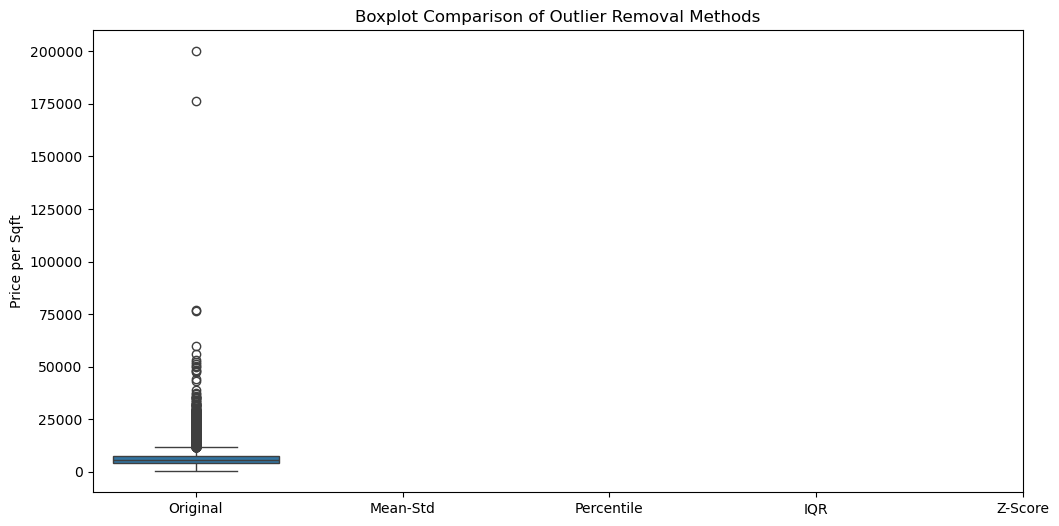

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots to compare
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df['price_per_sqft'], df_mean_std['price_per_sqft'], df_percentile['price_per_sqft'], df_iqr['price_per_sqft'], df_zscore['price_per_sqft']])
plt.xticks([0, 1, 2, 3, 4], ['Original', 'Mean-Std', 'Percentile', 'IQR', 'Z-Score'])
plt.title("Boxplot Comparison of Outlier Removal Methods")
plt.ylabel("Price per Sqft")
plt.show()

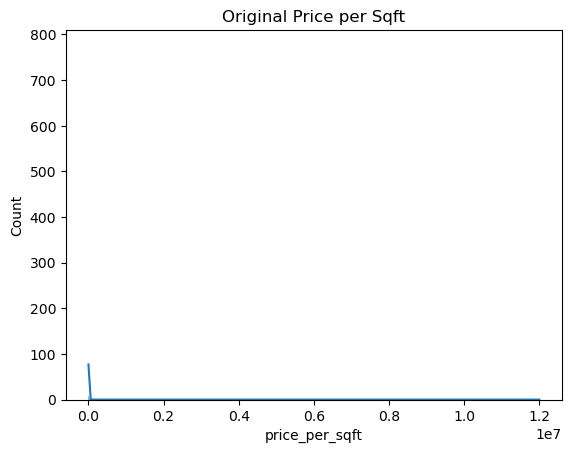

Skewness (before): 108.26875024325159
Kurtosis (before): 12090.633538860382


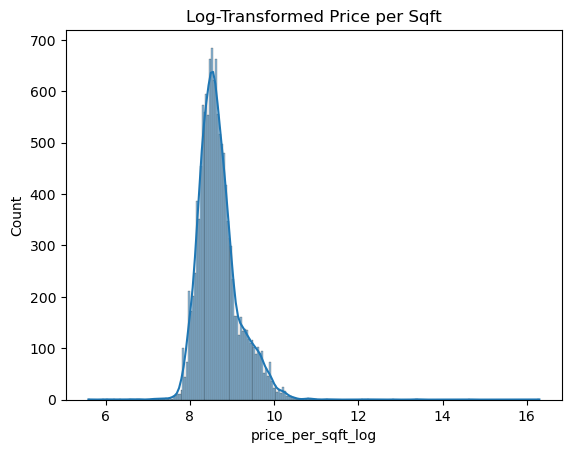

Skewness (after): 1.4003259019533636
Kurtosis (after): 9.203000543610957


In [34]:
from scipy.stats import skew, kurtosis
import numpy as np

# Original
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Original Price per Sqft")
plt.show()

print("Skewness (before):", skew(df['price_per_sqft']))
print("Kurtosis (before):", kurtosis(df['price_per_sqft']))

# Apply log transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title("Log-Transformed Price per Sqft")
plt.show()

print("Skewness (after):", skew(df['price_per_sqft_log']))
print("Kurtosis (after):", kurtosis(df['price_per_sqft_log']))

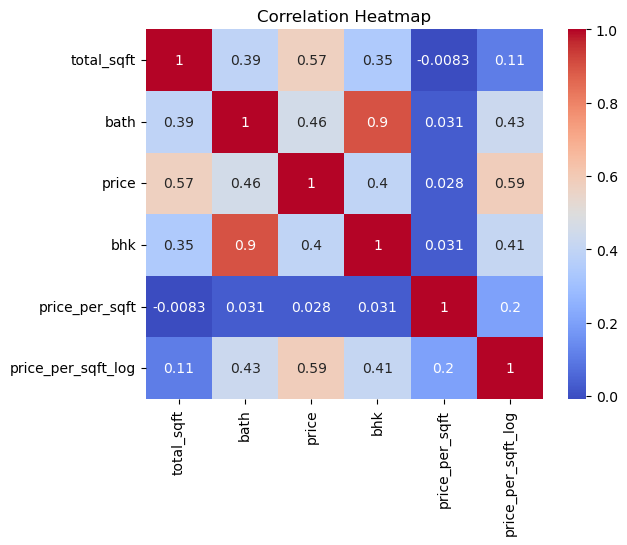

In [35]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

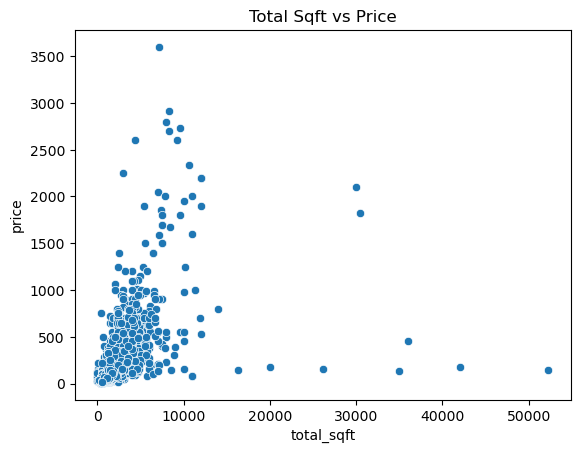

In [38]:
# Example: Price vs Square feet
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title("Total Sqft vs Price")
plt.show()